In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

Compactness= 26310.800090515986
Centers= [[ 59.84]
 [216.68]]


<ipython-input-2-1a75027bef5b>:24: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(A, 256, [0,256], color='r')
<ipython-input-2-1a75027bef5b>:25: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(B, 256, [0,256], color='b')
<ipython-input-2-1a75027bef5b>:27: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(centers, 32, [0,256], color='y')


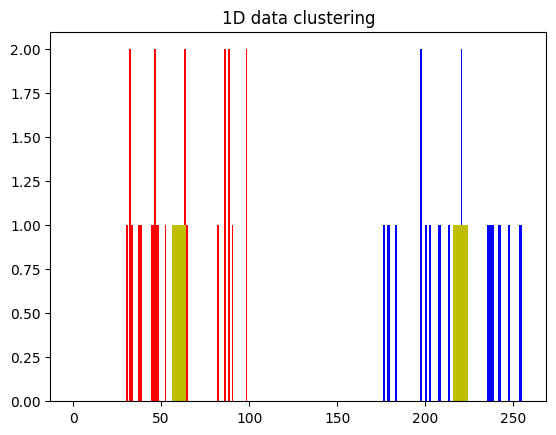

In [2]:
# 1D data 생성
x = np.random.randint(25,100,25)
y = np.random.randint(175,255,25)
z = np.hstack((x,y))  # shape=(50,)
z = z.reshape((50,1))  # column vector => shape=(50,1)
z = np.float32(z)

# kmeans 파라미터
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
attempts = 10
flags = cv.KMEANS_RANDOM_CENTERS

# K-means 클러스터링 수행
compactness, labels, centers = cv.kmeans(z, K, None, criteria, attempts, flags)
print("Compactness=", compactness)
print("Centers=", centers)

# 레이블 0,1에 따라 데이터 분리
A = z[labels==0]
B = z[labels==1]

# 시각화: hist
plt.hist(A, 256, [0,256], color='r')
plt.hist(B, 256, [0,256], color='b')
# 센터(=bin) 표시(노란색)
plt.hist(centers, 32, [0,256], color='y')
plt.title('1D data clustering')
plt.show()

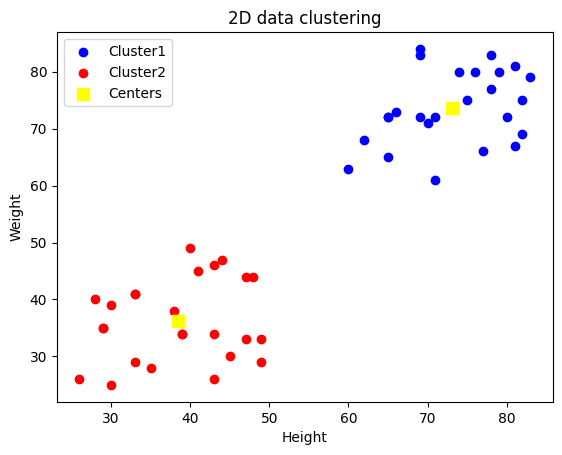

In [3]:
X = np.random.randint(25,50,(25,2))
Y = np.random.randint(60,85,(25,2))
Z = np.vstack((X,Y))

Z = np.float32(Z)

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
attempts = 10
ret, label, center = cv.kmeans(Z, K, None, criteria, attempts, cv.KMEANS_RANDOM_CENTERS)

A = Z[label.ravel()==0]
B = Z[label.ravel()==1]

plt.scatter(A[:,0], A[:,1], c='blue', label='Cluster1')
plt.scatter(B[:,0], B[:,1], c='red', label='Cluster2')
plt.scatter(center[:,0], center[:,1], s=80, c='yellow', marker='s', label='Centers')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.title('2D data clustering')
plt.show()

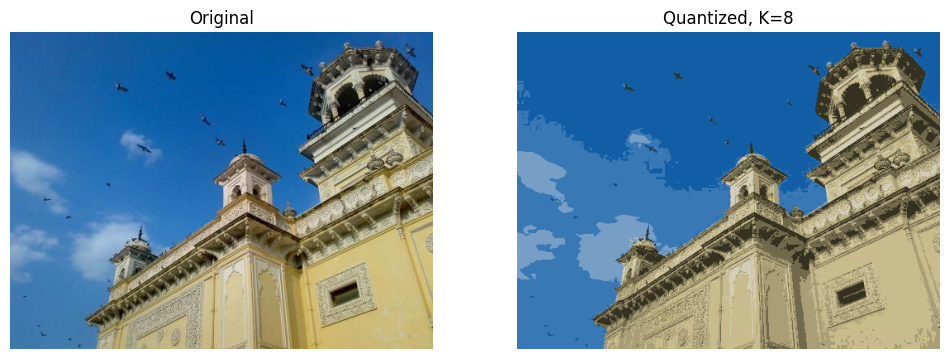

In [4]:
import os
img_path = 'home.jpg'  # 수정: 사용자가 원하는 이미지

if not os.path.exists(img_path):
    print("Please upload an image named 'home.jpg' or modify img_path.")
else:
    img = cv.imread(img_path)
    if img is None:
        print("Failed to load image.")
    else:
        Z = img.reshape((-1,3))
        Z = np.float32(Z)
        K = 8
        criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
        attempts = 10
        ret, label, center = cv.kmeans(Z, K, None, criteria, attempts, cv.KMEANS_RANDOM_CENTERS)

        center = np.uint8(center)
        res = center[label.flatten()]
        res2 = res.reshape((img.shape))

        # 시각화
        fig, axs = plt.subplots(1,2, figsize=(12,6))
        axs[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
        axs[0].set_title('Original')
        axs[0].axis('off')

        axs[1].imshow(cv.cvtColor(res2, cv.COLOR_BGR2RGB))
        axs[1].set_title('Quantized, K=8')
        axs[1].axis('off')
        plt.show()